**November 8, 2018**  
**ATMOS 5020: Environmental Programming**  
**John Horel & Brian Blaylock**

# Introduction to `matplotlib`
Information and knowledge is shared through visualizations. Some visualizations are better than others. Communicating data and results effectively through figures is both a skill and an art that can be learned.

`matplotlib.pyplot` is a powerful library to make highly customizable and professional-looking figures. It is the user's responsibility, however, to make sure the data displayed is accurate, clean, and readable.

`matplotlib` is built to work well with `numpy` arrays. If possible, convert you're data to a numpy array and you'll be in better shape.

<img src='./images/fig.png' align='right' width=500>

There are two ways to generate figures with matplotlib: 
1. The _easy way_ (similar to what you will do in MatLab)
    - Calls to `plt.` functions will automatically create figure and axes objects when they are needed.
        - `plt.plot()`
        - `plt.xlabel()`
        - `plt.title()`
        - `plt.grid()`
2. The _customizable way_, which utilizes the object-oriented nature of figure objects.
    - Explicitly create figures and axes first, and then do things to the axes methods.
        - `fig, ax = plt.subplots()`
        - `ax.plot()`
        - `ax.set_xlabel()`
        - `ax.set_title()`
        - `ax.grid()`

You will see both methods used in documentation and examples you find online. For this class, we will mostly use the _easy way_ and a show a few examples with the _customizable way_.

---

> #### References:
> Do not underestimate the usefulness of the documentation. Read them. They are written for you!
> - Introduction and Usage Guide: https://matplotlib.org/tutorials/introductory/usage.html
> - Basic matplotlib plotting (the easy way): https://matplotlib.org/tutorials/introductory/pyplot.html
> - Types of plots: https://matplotlib.org/tutorials/introductory/sample_plots.html
> - Other tutorials: https://matplotlib.org/tutorials/index.html

# 1-D plotting with `matplotlib`

Before we make a plot, we have to import the libraries we will use and then get or generate the data we want to visualize.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


#### Simple Plot
Generate some random data and make some simple plots

In [2]:
# Generate a vector of random data.
y = np.random.rand(10)

# Before you plot something, it is always good to LOOK AT THE DATA FIRST!
print('Random data:', y)

Random data: [0.56679625 0.8861129  0.20863392 0.09062863 0.1240905  0.72013416
 0.50014226 0.25052852 0.16126936 0.14447831]


Text(0.5,1,'Title')

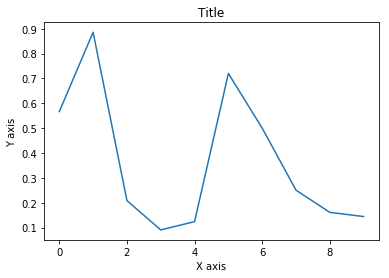

In [3]:
# Make a simple line plot
plt.plot(y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Title')

Rerun the above cell and see how the figure changes. Every time `np.random.rand(10)` is executed, it generates 10 random numbers between 0 and 1.

[Reference: numpy.random module](https://docs.scipy.org/doc/numpy/reference/routines.random.html)


Notice that the x values are automatically assigned based on the length of the y array. Also notice how all the data points are connected by a line.

---

#### Line and Scatter Plots

Now generate some x values to match with each y value and make a _scatter plot_. For a scatter plot to work, the amount of values in x an y must be the same. 

Each figure element can be customized with different chart elements.

Look at the cell and figure below. How are different chart elements controled? 

In [4]:
# Make a new vector for x with the same length as y
x = np.random.rand(len(y))

print('x data:', x)
print('y data:', y)

x data: [0.45076732 0.7657215  0.2603069  0.11875548 0.52891902 0.4421796
 0.18426704 0.61008837 0.16451962 0.76394309]
y data: [0.56679625 0.8861129  0.20863392 0.09062863 0.1240905  0.72013416
 0.50014226 0.25052852 0.16126936 0.14447831]


Study the statements below. Try modifying and removing/adding different arguments to each of the `plt.` functions until you know what each does...

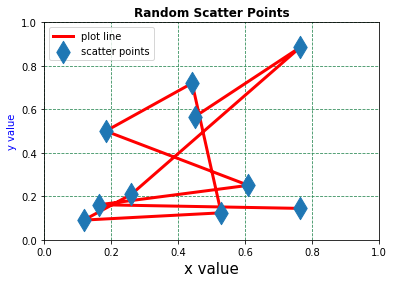

In [5]:
# Plot the data. 
plt.scatter(x, y, marker='d', s=250, label='scatter points', zorder=5)
plt.plot(x, y, color='red', lw=3, label='plot line')

# Add some chart elements
plt.title('Random Scatter Points', fontweight='bold')
plt.xlabel('x value', fontsize=15)
plt.ylabel('y value', color='blue')

# Set the axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# Add a legend. 
# Legend's requires the ploted data to have a `label` associated with them.
plt.legend()

# Add grid lines
plt.grid(linestyle='--', color='seagreen')

#### Histogram

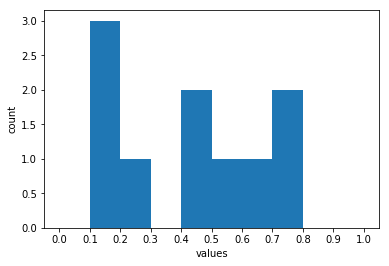

In [6]:
# Histogram
custom_bins = np.arange(0,1.1,.1)
plt.hist(x, bins=custom_bins)
plt.ylabel('count')
plt.xlabel('values')
plt.xticks(custom_bins);

#### Bar Chart

<BarContainer object of 10 artists>

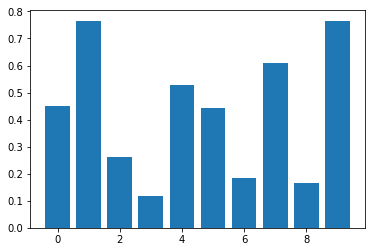

In [7]:
# The bar chart needs two imputs, one the same size as the x array.
plt.bar(range(len(x)), x)

---
# Projectile Path
A classical physics problem is to calculate the path of a projectile. The following equations are coded in the `proj_position` function.

Reference: [Projectile Motion (Wikipedia)](https://en.wikipedia.org/wiki/Projectile_motion)

|-|Equation|
|--|--|
|X-Position|\begin{equation}
    x = v_0t\cos\theta
\end{equation}
|Y-Position|\begin{equation}
     y = v_0t\sin\theta - \frac{1}{2}gt^2
\end{equation}
|Time of Flight|\begin{equation}
    t = \frac{2v_0\sin\theta}{g}
\end{equation}
|Velocity|\begin{equation}
    v_x = v_0\cos\theta
\end{equation}<br>\begin{equation}
    v_y = v_0\sin\theta-gt
\end{equation}<br>\begin{equation}
    v = \sqrt{v_x^2+v_y^2}
\end{equation}

 

In [8]:
def proj_position(v0, theta, num=51):
    """
    Calculate the x and y position and velocity of a projectile at time t
    when launched at angle theta with velocity v0.
    
    Input:
        v0    - initial velocity of the projectile when launched (m/s)
        theta - angle projectile is launched (degrees)
        num   - number of point calculations per flight used by np.linspace().
    Output:
        t     - time vector (seconds)
        x     - x position vector (m)
        y     - y position vector (m)
        v_x   - x-component velocity vector (m/s)
        v_y   - y-component velocity vector (m/s)
        v     - velocity magnitude vector (m/s)
    """
    
    # Gravitational Acceleration
    g = 9.81  # m/s^2
    
    # Calculate total time of flight
    total_t = 2*v0*np.sin(np.deg2rad(theta))/g
    # Create a time vector between 0 and total time.
    t = np.linspace(0,total_t,num)
    
    # Calculate X and Y position of projectile
    x = v0*t*np.cos(np.deg2rad(theta))
    y = v0*t*np.sin(np.deg2rad(theta)) - .5*g*t**2
    
    # Compute velocity components and magnitude
    v_x = v0*np.cos(np.deg2rad(theta)) * np.ones_like(t)
    v_y = v0*np.sin(np.deg2rad(theta)) - g*t
    v = np.sqrt(v_x**2+v_y**2)
    
    return t, x, y, v_x, v_y, v

#### Plot the trajectory of a projectile

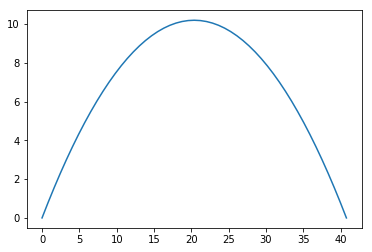

In [9]:
velocity = 20
angle = 45
t, x, y, v_x, v_y, v = proj_position(velocity, angle)
plt.plot(x, y, label=r'%s$\degree$ t=%.1f s' % (angle, t[-1]))

#### Plot the trajectory of many projectiles

Text(1,1,'Initial Velocity: 20.0')

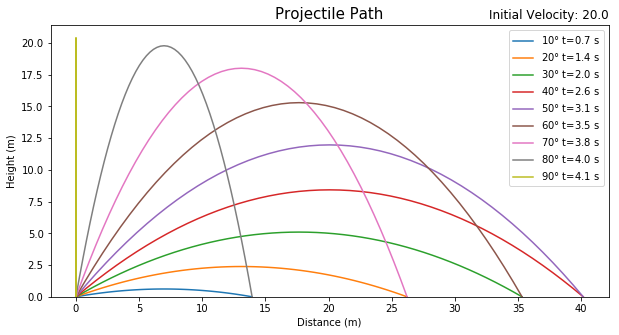

In [10]:
plt.figure(figsize=[10,5])

velocity = 20            # m/s

for angle in range(10,91,10):
    # Compute the path for each
    t, x, y, v_x, v_y, v = proj_position(velocity, angle)
    
    plt.plot(x, y, label=r'%s$\degree$ t=%.1f s' % (angle, t[-1]))

plt.legend()
plt.ylim(ymin=0)

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Path', fontsize=15);
plt.title('Initial Velocity: %.1f' % velocity, loc='right')

### Exercise #1:
Instead of plotting different projections for different angles, plot projections for different velocities.

### Exercise #2:

Change the function `proj_position` to accept an input for gravitional acceleration, and then plot the projectile position for each of the different planets. Add a legend to indicate the planet of each projectile.

<img src='./images/accel-of-gravity-other-planets.png'  align='right' width=300>

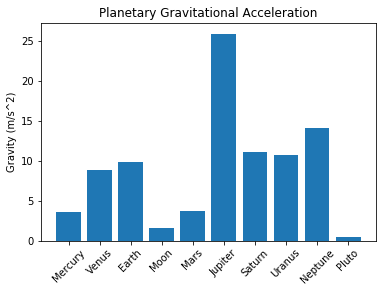

In [11]:
planets = ['Mercury', 'Venus', 'Earth', 'Moon', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']
g = [3.59, 8.87, 9.81, 1.62, 3.77, 25.95, 11.08, 10.67, 14.07, 0.42]

plt.bar(planets, g)
plt.ylabel('Gravity (m/s^2)')
plt.xticks(rotation=45)
plt.title('Planetary Gravitational Acceleration');

In [12]:
velocity = 10
angle = 45

# for loop for every planet. Since we want to access values for both planets and g, you might consider using enumerate().
    # call the modified proj_projectile funcntion
    # plot the path and include the name of the planet in the label

# other plot housekeeping (title, labels, legend, etc.)




---

# Meteorological Data
On GitHub, look in the `data` folder for a file called `WBB.csv` and download it. This is weather observations from the William Browning Building. Data was retreived from the [MesoWest download page](https://mesowest.utah.edu/cgi-bin/droman/download_api2.cgi?stn=KSLC&year1=2018&day1=16&month1=10&hour1=17&timetype=LOCAL&unit=0)

Open the `.csv` file in the Jupyter Lab environment to see the column contents and the units.

- The 0th column is the Station ID
- The 1st column is the Date
- The 2nd column is the temperature in Celsius
- The 3rd column is the relative humidity in percent
- The 4th column is the wind speed in meters per second
- The 5th column is the wind direction in degrees

There are many ways we can read this data into Python, but don't worry about it today (another lecture on I/O will happen later).

In [13]:
#Load five days of 1 minute weather data for the William Browning Building (WBB) on the UofU campus.
# EDIT THE PATH OF THE FILE
dates = np.genfromtxt('./data/WBB.csv', skip_header=8, delimiter=',', usecols=1, dtype=str)
temperature = np.genfromtxt('./data/WBB.csv', skip_header=8, delimiter=',', usecols=2)
relative_humidity = np.genfromtxt('./data/WBB.csv', skip_header=8, delimiter=',', usecols=3)

In [14]:
print(dates)
print(temperature)
print(relative_humidity)

['10/11/2018 12:00 MDT' '10/11/2018 12:01 MDT' '10/11/2018 12:02 MDT' ...
 '10/16/2018 11:58 MDT' '10/16/2018 11:59 MDT' '10/16/2018 12:00 MDT']
[10.96 11.11 10.89 ... 10.19 10.02 10.03]
[53.36 52.37 52.9  ... 33.95 34.51 34.89]


Plot the data on a simple plot...

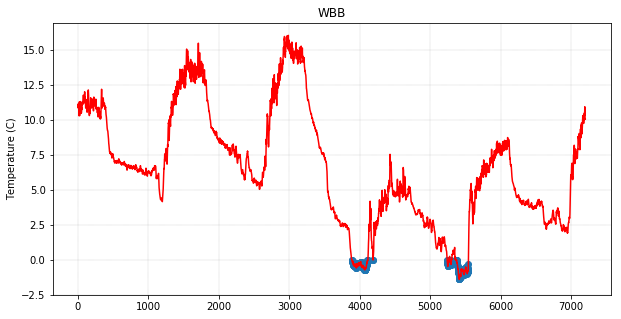

In [15]:
plt.figure(figsize=[10,5])
plt.plot(temperature, color='red')

plt.ylabel('Temperature (C)')
plt.title('WBB')

plt.grid(linestyle='--', color='grey', linewidth=.2)

# Highlight the points where temperature dropped below 0 degrees Celsius.
plt.scatter(np.argwhere(temperature<0), temperature[np.argwhere(temperature<0)])

This is nice, but we would really like to see the dates on the x axis.

But`dates` is a list of strings! It would be really nice to convert those dates to something Python understood as dates.

Fortunatly, Python has some built-in tools for converting strings to `datetime` objects.

[Reference: Python datetime string formater](https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior)

In [16]:
# Import Python's datetime module
from datetime import datetime

In [17]:
# Get a date from the list
date0 = dates[0]
print(date0)

# Convert the string date to a datetime object
new_date = datetime.strptime(date0, '%m/%d/%Y %H:%M MDT')
new_date

10/11/2018 12:00 MDT


datetime.datetime(2018, 10, 11, 12, 0)

To convert all the values in the dates list, I introduce a condensed `for loop` or [list comprehensions](https://www.digitalocean.com/community/tutorials/understanding-list-comprehensions-in-python-3). 

We can use list comprehension to convert all the values in the list `dates`.

    new_list = [x for x in iterable]

In [18]:
# List comprehension example: convert all items in a list to upper case
new_list = [x.upper() for x in ['hi', 'bye', 'stop', 'go']]
print(new_list)

['HI', 'BYE', 'STOP', 'GO']


In [19]:
formated_dates = np.array([datetime.strptime(i, '%m/%d/%Y %H:%M MDT') for i in dates])

In [20]:
print(dates)
print(formated_dates)

['10/11/2018 12:00 MDT' '10/11/2018 12:01 MDT' '10/11/2018 12:02 MDT' ...
 '10/16/2018 11:58 MDT' '10/16/2018 11:59 MDT' '10/16/2018 12:00 MDT']
[datetime.datetime(2018, 10, 11, 12, 0)
 datetime.datetime(2018, 10, 11, 12, 1)
 datetime.datetime(2018, 10, 11, 12, 2) ...
 datetime.datetime(2018, 10, 16, 11, 58)
 datetime.datetime(2018, 10, 16, 11, 59)
 datetime.datetime(2018, 10, 16, 12, 0)]


Now that we have the dates in a python-readable format, we can plot our weather observations against temperature.


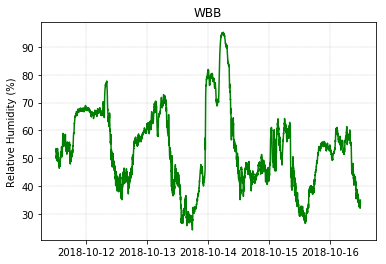

In [21]:
plt.plot(formated_dates, relative_humidity, color='green')

plt.ylabel('Relative Humidity (%)')
plt.title('WBB')

plt.grid(linestyle='--', color='grey', linewidth=.2)

---
---

# Use matplotlib the _Customizable_ way

### Twin Axis
What if we want to plot Temperature and Relative Humidity on the same axis...

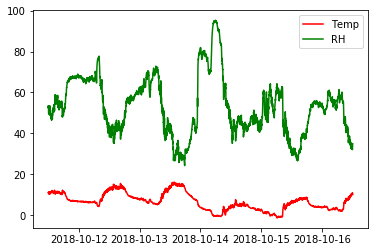

In [22]:
plt.plot(formated_dates, temperature, 'r', label='Temp')
plt.plot(formated_dates, relative_humidity, 'g', label="RH")
plt.legend()

This is fine, but the temperature and humidity range of values are not similar. Wouldn't it be nice if there were two different y axes? We can accomplish this with a little bit more formatting.

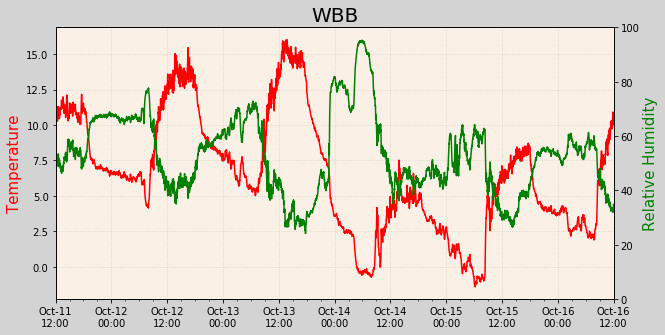

In [23]:
# Explicitly create the `fig` and `ax1` figure objects
fig, ax1 = plt.subplots(figsize=[10,5], facecolor='lightgrey')

# Plot Temperature on ax1
ax1.plot(formated_dates, temperature, 'r')
ax1.set_ylabel('Temperature', color='r', fontsize=15)

# Create ax2 and plot Relative Humidity
ax2 = ax1.twinx() # make ax2 share the x axis
ax2.plot(formated_dates, relative_humidity, 'g')
ax2.set_ylabel('Relative Humidity', color='g', fontsize=15)
ax2.set_ylim([0,100])

# Add a title
plt.title('WBB', fontsize=20)

# Modify date axis format. These are thing you can learn to do with some internet searches.
from matplotlib.dates import DateFormatter, HourLocator
ax1.xaxis.set_major_formatter(DateFormatter('%b-%d\n%H:%M'))
ax1.xaxis.set_major_locator(HourLocator(range(0,24,12)))
ax1.xaxis.set_minor_locator(HourLocator(range(0,24,3)))

ax1.grid(linestyle=':', alpha=.5) # alpha is transparency

ax1.set_facecolor('linen')

# Set the xlim as the first and last date
plt.xlim(formated_dates[0], formated_dates[-1]);

# Save the figure
#plt.savefig('my_wbb_figure')

### Exercise #3
[MesoWest plots](https://mesowest.utah.edu/cgi-bin/droman/meso_base_dyn.cgi?stn=WBB&unit=0&time=LOCAL&product=&year1=&month1=&day1=00&hour1=00&hours=24&graph=1&past=0&order=1) are not made with Python, but can you create a figure similar to the MesoWest plots for wind speed and direction?

<img src='./images/wbb_wind.png' width=65%>

In [24]:
# Load wind speed and wind direction from csv file


# Create fig and axis


# Plot wind speed as red


# create new twin axis and plot wind direction
## (can you modify the yticks and labels to give the cardinal direction instead of a number)




### Multi-Pannel Plots

We can make multi-pannel plots, but we need to use the _customizable way_ of using matplotlib.

In [25]:
# Generate two different random datasets
x = np.random.uniform(0,1,1000)
y = np.random.normal(0,1,1000)

Text(0.5,0.98,'Both Plots Below')

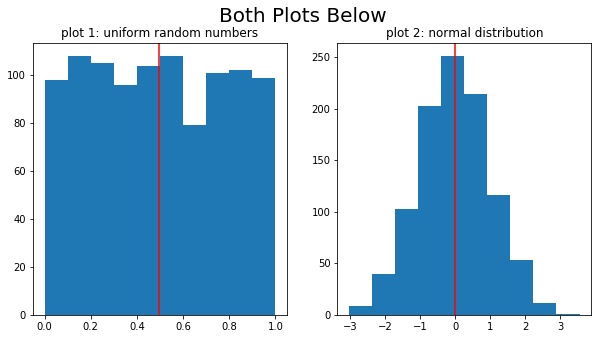

In [26]:
# Explicitly create the figure and axes objects
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

# On ax1, plot one dataset
ax1.hist(x)
ax1.axvline(x.mean(), color='red')
ax1.set_title('plot 1: uniform random numbers')

# On ax2, plot the other dataset
ax2.hist(y)
ax2.axvline(y.mean(), color='red')
ax2.set_title('plot 2: normal distribution')

plt.suptitle('Both Plots Below', fontsize=20)